# BIRTH RATE ANALYSIS

Freely available data on births in the United States, provided by the Centers for Disease Control (CDC).

Given that the dataset consists of features such as year, month, day, and gender, along with a numerical target variable 
(births), I approach this as a regression problem, aiming to predict the number of births based on the given features.

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\user\Desktop\All DATAS\births.csv")
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [2]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [4]:
df.shape

(15547, 5)

In [5]:
df.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [6]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [7]:
df["day"].fillna(df["day"].mean(),inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [9]:
df["gender"] = label_encoder.fit_transform(df["gender"])

In [10]:
df.dtypes

year        int64
month       int64
day       float64
gender      int32
births      int64
dtype: object

Define X and Y

In [11]:
X = df[["year","month","day","births"]]
Y = df["gender"]

Train,Test,Split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=0)

### Model Building

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

Prediction

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1545   43]
 [1476   46]]


Heat Map

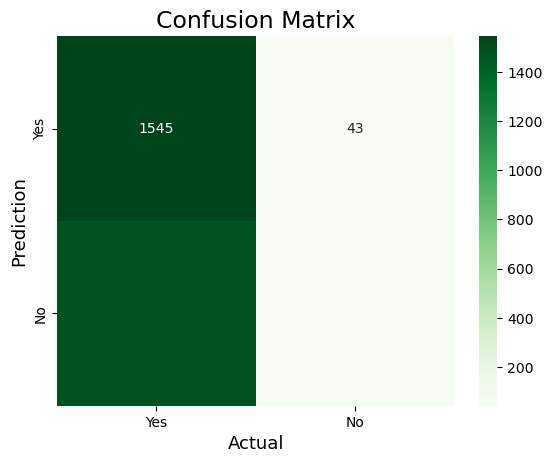

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt='g',xticklabels=["Yes","No"],yticklabels=["Yes","No"],cmap='Greens')
plt.ylabel("Prediction",fontsize=13)
plt.xlabel("Actual",fontsize=13)
plt.title("Confusion Matrix",fontsize=17)
plt.show()

Classification Report

In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.97      0.67      1588
           1       0.52      0.03      0.06      1522

    accuracy                           0.51      3110
   macro avg       0.51      0.50      0.36      3110
weighted avg       0.51      0.51      0.37      3110

